# atlases

In [1]:
# from importlib import reload
# import sys
# reload(sys.modules["util.atlas"])

import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns

from util import plot
from tqdm import tqdm
from neuromaps.transforms import mni152_to_fsaverage
from matplotlib.colors import ListedColormap
from util.atlas import Atlas

In [2]:
%cd ..

/scratch/gpfs/zzada/narrative-gradients


In [3]:
schaefer = Atlas.schaefer(kong=True)

## Ev 2010

In [29]:
lang_atlas = Atlas.ev2010()

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(lang_atlas.label_img, vmax=1, vmin=0, threshold=0, cmap="Reds", atlas=schaefer, fig=fig, ax=ax, cbar=False)
fig.text(.5, .5, 'Ev 2010', ha='center')
fig.show()

## Lipkin 2022

In [31]:
lana_atlas = Atlas.lana2022()

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(lana_atlas.label_img, vmin=0.1, threshold=0.1, cmap="hot", atlas=schaefer, fig=fig, ax=ax, cbar=False)
fig.text(.5, .5, 'lipkin', ha='center')
fig.show()

## Narratives

In [ ]:
# load narratives data
gLh = nib.load("mats/narratives-group_space-fsaverage6_hemi-L_desc-mean_isc.gii")
gRh = nib.load("mats/narratives-group_space-fsaverage6_hemi-R_desc-mean_isc.gii")
left_data = gLh.agg_data()
right_data = gRh.agg_data()
narratives = np.concatenate((left_data, right_data))
narratives[np.isnan(narratives)] = 0
narratives.min(), narratives.max()

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(narratives, vmin=0.1, threshold=0.1, cmap="hot", atlas=schaefer,
                  surf_lh_fn="../fconv/mats/suma-fsaverage6/lh.inf_10.gii",
                  surf_rh_fn="../fconv/mats/suma-fsaverage6/rh.inf_10.gii",
                  fig=fig, ax=ax, cbar=False)
fig.text(.5, .5, 'narratives ISC', ha='center')
fig.show()

## neurosynth

In [ ]:
# neursoynth lang
gifL, gifR = mni152_to_fsaverage("mats/language_association-test_z_FDR_0.01.nii.gz")
ns_lang = np.concatenate((gifL.agg_data(), gifR.agg_data()))
ns_lang.min(), ns_lang.max()

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(ns_lang, vmin=0.1, threshold=2, cmap="hot", atlas=schaefer, fig=fig, ax=ax, cbar=False)
fig.text(.5, .5, 'neurosynth lang', ha='center')
fig.show()

## composite 

In [ ]:
# binarize
lang_bin = (lang_atlas.label_img > 0).astype(np.int32)
lana_bin = (lana_atlas.label_img > 0.1).astype(np.int32)
nslg_bin = (ns_lang > 2).astype(np.int32)
nara_bin = (narratives > 0.1).astype(np.int32)

composite = lang_bin + lana_bin + nslg_bin + nara_bin
# composite = lana_bin + nslg_bin + nara_bin
np.max(composite)

In [ ]:
colors = sns.color_palette("rocket", 4).as_hex()
cmap = ListedColormap(colors, "intensity", N=4)
cmap

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(composite, vmin=1, vmax=5, cmap=cmap, atlas=schaefer, fig=fig, ax=ax, cbar=False)
fig.text(.5, .5, 'composite', ha='center')
fig.show()

# Kong parcels

save an image per parcel

In [5]:
!mkdir -p figures/kong-rois/{l,r}h

In [ ]:
# left hemisphere
for label, i in tqdm(schaefer.label2id.items()):
    if i > 500: break
    if i < 417: continue
    fig, ax = plt.subplots(dpi=300)
    plot.surface_plot(schaefer.label_img == i,
                      cmap='Oranges', vmin=0, vmax=1, fig=fig, ax=ax, title=label, cbar=False, atlas=schaefer)
    fig.savefig(f"figures/kong-rois/lh/{label}.png")
    plt.close()
plt.close()

In [ ]:
# right hemisphere
for label, i in tqdm(schaefer.label2id.items()):
    # if i < 501: continue
    if i < 914: continue
    fig, ax = plt.subplots(dpi=300)
    plot.surface_plot(schaefer.label_img == i,
                      cmap='Oranges', vmin=0, vmax=1, fig=fig, ax=ax, title=label, cbar=False, atlas=schaefer)
    fig.savefig(f"figures/kong-rois/rh/{label}.png")
    plt.close()
plt.close()

# Kong Networks

In [ ]:
kong_nets = schaefer.to_network(symmetric=True)

for label, label_id in kong_nets.label2id.items():
    if label_id == 0: continue
    regions = kong_nets.label_img == label_id
    fig, ax = plt.subplots(dpi=300)
    plot.surface_plot(regions, vmax=1, vmin=0, cmap='Oranges', atlas=schaefer, fig=fig, ax=ax, cbar=False)
    fig.text(.5, .5, label, ha='center')
    fig.show()

# language ROIs

In [76]:
kong_rois = {}
kong_rois["LH_EAC"] = [
    "17networks_LH_Aud_ST_1",
    "17networks_LH_Aud_ST_2",
    "17networks_LH_Aud_ST_3",
    "17networks_LH_Aud_ST_7",
    "17networks_LH_Aud_ST_8",
    "17networks_LH_Aud_ST_11",
    "17networks_LH_Aud_ST_12",
    "17networks_LH_Aud_Ins_1",
    "17networks_LH_Aud_Ins_2",
    "17networks_LH_SomMotB_ParOper_3",
]
kong_rois["LH_Lang_STG"] = [
    "17networks_LH_Aud_ST_4",
    "17networks_LH_Aud_ST_5",
    "17networks_LH_Aud_ST_6",
    "17networks_LH_Aud_ST_9",
    "17networks_LH_Aud_ST_10",
    "17networks_LH_Language_Temp_5",
    "17networks_LH_DefaultB_TempPole_5",
]
kong_rois["LH_Lang_STSda"] = [
    "17networks_LH_Aud_ST_19",
    "17networks_LH_DefaultA_Temp_2",
    "17networks_LH_Language_Temp_6",
]
kong_rois["LH_Lang_STSva"] = [
    "17networks_LH_DefaultA_Temp_1",
    "17networks_LH_DefaultB_TempPole_2",
]
kong_rois["LH_Lang_STSdm"] = [
    "17networks_LH_Aud_ST_16",
    "17networks_LH_Aud_ST_17",
    "17networks_LH_Aud_ST_18",
    "17networks_LH_DefaultB_Temp_5",
    "17networks_LH_Language_Temp_1",
    "17networks_LH_Language_Temp_2",
    "17networks_LH_Language_Temp_3",
    "17networks_LH_Language_Temp_4",
]
kong_rois["LH_Lang_STSvm"] = [
    "17networks_LH_DefaultB_Temp_1",
    "17networks_LH_DefaultB_Temp_2",
    "17networks_LH_DefaultB_Temp_3",
    "17networks_LH_DefaultB_Temp_4",
    "17networks_LH_SalVenAttnB_Temp_1",
    "17networks_LH_ContA_Temp_2",
    "17networks_LH_DorsAttnA_TempOcc_3",
]
kong_rois["LH_Lang_STSp"] = [
    "17networks_LH_Aud_ST_13",
    "17networks_LH_Aud_ST_14",
    "17networks_LH_Aud_ST_15",
    "17networks_LH_SalVenAttnB_Temp_2",
    "17networks_LH_SalVenAttnB_Temp_3",
    "17networks_LH_DefaultB_IPL_1",
    "17networks_LH_DefaultB_IPL_2",
    "17networks_LH_DefaultB_IPL_6",
    "17networks_LH_DefaultB_IPL_7",
    "17networks_LH_DefaultB_IPL_8",
    "17networks_LH_Language_IPL_3",
]
# kong_rois["LH_Lang_IFG"] = [
#     "17networks_LH_ContA_PFCl_4",
#     "17networks_LH_ContA_PFCl_9",
#     "17networks_LH_Language_IFG_1",  # expanded
#     "17networks_LH_Language_IFG_2",
#     "17networks_LH_SalVenAttnB_IFG_2",
#     "17networks_LH_SalVenAttnB_IFG_3",
# ]
# kong_rois["LH_Lang_IFG_Orb"] = [
#     "17networks_LH_Language_IFG_3",
#     "17networks_LH_Language_IFG_4",
#     "17networks_LH_DefaultB_PFCv_1",
#     "17networks_LH_DefaultB_PFCv_3",
# ]
# kong_rois["LH_Lang_IFS"] = [
#     "17networks_LH_ContA_PFCl_1",
#     "17networks_LH_ContA_PFCl_2",
#     "17networks_LH_ContA_PFCl_3",
#     "17networks_LH_ContA_PFCl_5",
#     "17networks_LH_ContA_PFCl_6",
#     "17networks_LH_ContA_PFCl_7",
#     # "17networks_LH_DorsAttnA_PrCv_1",
#     # "17networks_LH_DorsAttnA_PrCv_2",
#     "17networks_LH_DorsAttnA_PrCv_3",
# ]
# kong_rois["LH_Lang_IFG_Oper"] = [
#     "17networks_LH_ContA_Ins_2",
#     "17networks_LH_SalVenAttnB_Ins_3",
# ]
# kong_rois["LH_Lang_MFG"] = [
#     "17networks_LH_Language_PFCl_1",
#     # "17networks_LH_DorsAttnA_PrCd_1",
#     "17networks_LH_VisualA_PrC_1",
#     "17networks_LH_VisualA_PrC_2",
#     "17networks_LH_SomMotB_11",
# ]
# kong_rois["LH_Lang_SFL"] = [
#     "17networks_LH_DefaultB_PFCd_1",
#     "17networks_LH_Language_PFCd_2",
# ]
# kong_rois["LH_Lang_SMG"] = [
#     "17networks_LH_SalVenAttnA_IPL_2",
#     "17networks_LH_SalVenAttnB_IPL_1",
#     "17networks_LH_SalVenAttnB_IPL_3",
#     "17networks_LH_Language_IPL_1",
#     "17networks_LH_Language_IPL_2",
# ]
# kong_rois["LH_Lang_AngG"] = [
#     "17networks_LH_Aud_ParOcc_4",
#     "17networks_LH_DefaultA_IPL_1",
#     "17networks_LH_DefaultA_IPL_2",
#     "17networks_LH_DefaultA_IPL_4",
#     "17networks_LH_DefaultA_IPL_5",
#     "17networks_LH_DefaultB_IPL_5",
#     "17networks_LH_DefaultC_IPL_1",
#     "17networks_LH_DefaultC_IPL_2",
# ]
# kong_rois["LH_Lang_IPL"] = [
#     "17networks_LH_ContB_IPL_1",
#     "17networks_LH_ContB_IPL_2",
#     "17networks_LH_ContB_IPL_3",
#     "17networks_LH_ContB_IPL_4",
#     "17networks_LH_ContB_IPL_5",
#     "17networks_LH_ContB_IPL_6",
#     "17networks_LH_ContB_IPL_7",
#     "17networks_LH_DefaultA_IPL_6",
#     "17networks_LH_DefaultB_IPL_3",
#     "17networks_LH_DefaultB_IPL_4",
# ]
# kong_rois["LH_DMN_Cont_C"] = [
#     "17networks_LH_ContC_pCun_1",
#     "17networks_LH_ContC_pCun_2",
#     "17networks_LH_ContC_pCun_3",
#     "17networks_LH_ContC_pCun_4",
#     "17networks_LH_ContC_pCun_5",
#     "17networks_LH_ContC_pCun_6",
# ]
# kong_rois["LH_DMN_PMC_A"] = [
#     "17networks_LH_DefaultA_PCC_1",
#     "17networks_LH_DefaultA_PCC_2",
#     "17networks_LH_DefaultA_pCun_1",
#     "17networks_LH_DefaultA_pCun_2",
#     "17networks_LH_DefaultA_pCun_3",
#     "17networks_LH_DefaultA_pCun_4",
#     "17networks_LH_DefaultA_pCun_5",
#     "17networks_LH_DefaultA_pCun_6",
# ]
# kong_rois["LH_DMN_PMC_B"] = [
#     "17networks_LH_DefaultB_PCC_2",
#     "17networks_LH_DefaultB_PCC_3",
#     "17networks_LH_DefaultB_PCC_4",
#     "17networks_LH_DefaultB_PCC_5",
#     "17networks_LH_ContC_Cingp_3",
# ]
# kong_rois["LH_DMN_PMC_C"] = [
#     "17networks_LH_DefaultC_pCun_1",
#     "17networks_LH_DefaultC_pCun_2",
#     "17networks_LH_DefaultC_pCun_3",
#     "17networks_LH_DefaultC_pCun_4",
#     "17networks_LH_DefaultC_pCun_5",
#     "17networks_LH_DefaultC_pCun_6",
#     "17networks_LH_DefaultC_pCun_7",
#     "17networks_LH_DefaultC_pCun_8",
#     "17networks_LH_DefaultC_RSC_1",
#     "17networks_LH_DefaultC_RSC_2",
#     "17networks_LH_DefaultC_RSC_3",
#     "17networks_LH_DefaultC_RSC_4",
# ]
# kong_rois["LH_DMN_PHC"] = ["17networks_LH_DefaultC_PHC_4"]
# kong_rois["LH_DMN_dmPFC"] = [
#     "17networks_LH_DefaultB_PFCd_4",
#     "17networks_LH_DefaultB_PFCd_7",
#     "17networks_LH_DefaultB_PFCd_8",
#     "17networks_LH_DefaultB_PFCd_9",
#     "17networks_LH_DefaultA_PFCm_1",
#     "17networks_LH_DefaultA_FPole_3",
# ]
# kong_rois["LH_SM"] = [
#     "17networks_LH_SomMotB_13",
#     "17networks_LH_SomMotB_14",
#     "17networks_LH_SomMotB_15",
#     "17networks_LH_SomMotB_16",
#     "17networks_LH_SomMotB_17",
#     "17networks_LH_SomMotB_18",
#     "17networks_LH_SomMotB_19",
#     "17networks_LH_SomMotB_20",
#     "17networks_LH_SomMotB_21",
#     "17networks_LH_SomMotB_ParOper_6",
#     "17networks_LH_DorsAttnB_ParOper_1",
# ]

In [11]:
# kong_rois = {}
kong_rois["RH_EAC"] = [
    "17networks_RH_Aud_Ins_2",
    "17networks_RH_Aud_ParOper_1",
    "17networks_RH_Aud_ParOper_3",
    "17networks_RH_Aud_ParOper_4",
    "17networks_RH_Aud_ST_1",
    "17networks_RH_Aud_ST_3",
    "17networks_RH_Aud_ST_7",
    "17networks_RH_SomMotB_Ins_4",
]
kong_rois["RH_Lang_STG"] = [
    "17networks_RH_Aud_ST_2",
    "17networks_RH_Aud_ST_4",
    "17networks_RH_Aud_ST_5",
    "17networks_RH_Aud_ST_9",
    "17networks_RH_Aud_ST_10",
    "17networks_RH_Aud_ST_12",
    "17networks_RH_Aud_ST_13",
    "17networks_RH_DefaultA_Temp_7",
    "17networks_RH_Language_TempPole_2",
]
kong_rois["RH_Lang_STSda"] = [
    "17networks_RH_Aud_ST_11",
    "17networks_RH_DefaultA_Temp_5",
    "17networks_RH_DefaultA_Temp_6",
    "17networks_RH_Language_Temp_5",
]
kong_rois["RH_Lang_STSva"] = [
    "17networks_RH_DefaultA_Temp_1",
    "17networks_RH_DefaultA_Temp_4",
    "17networks_RH_DefaultB_TempPole_2",
]
kong_rois["RH_Lang_STSdm"] = [
    "17networks_RH_Aud_Temp_1",
    "17networks_RH_Aud_ST_8",
    "17networks_RH_Language_Temp_1",
    "17networks_RH_Language_Temp_3",
    "17networks_RH_Language_Temp_4",
    "17networks_RH_Language_Temp_6",
]
kong_rois["RH_Lang_STSvm"] = [
    "17networks_RH_Language_Temp_2",
    "17networks_RH_DefaultB_Temp_1",
    "17networks_RH_DefaultB_Temp_2",
    "17networks_RH_DefaultB_Temp_3",
    "17networks_RH_SalVenAttnB_Temp_1",
    "17networks_RH_SalVenAttnB_Temp_2",
]
kong_rois["RH_Lang_pSTS"] = [
    "17networks_RH_Aud_ParOcc_1",
    "17networks_RH_Aud_ParOcc_2",
    "17networks_RH_Aud_ParOcc_3",
    "17networks_RH_SalVenAttnB_Temp_3",
    "17networks_RH_SalVenAttnB_IPL_4",
    "17networks_RH_SalVenAttnB_IPL_7",
    "17networks_RH_SalVenAttnB_IPL_8",
    "17networks_RH_DefaultA_IPL_1",
    "17networks_RH_DefaultA_IPL_2",
    "17networks_RH_DefaultA_IPL_3",
    "17networks_RH_DefaultB_IPL_1",
    "17networks_RH_DefaultB_IPL_2",
    "17networks_RH_DefaultB_IPL_3",
    "17networks_RH_DefaultC_IPL_3",
    "17networks_RH_DefaultC_IPL_6",
    "17networks_RH_DefaultC_IPL_7",
]
kong_rois["RH_Lang_IFG"] = [
    "17networks_RH_Language_PFCl_3",
    "17networks_RH_Language_PFCl_4",
    "17networks_RH_ContA_PFCl_5",
    "17networks_RH_ContB_IFG_1",
    "17networks_RH_ContB_IFG_3",
    # "17networks_RH_SalVenAttnB_IFG_2",
    "17networks_RH_SalVenAttnB_IFG_3",
    "17networks_RH_ContA_PFCl_6",
]
kong_rois["RH_Lang_IFG_Orb"] = [
    "17networks_RH_ContB_IFG_2",
    "17networks_RH_Language_IFG_1",
    "17networks_RH_Language_IFG_3",
]
kong_rois["RH_Lang_IFS"] = [
    "17networks_RH_ContA_PFCl_1",
    "17networks_RH_ContA_PFCl_2",
    "17networks_RH_ContA_PFCl_4",
    "17networks_RH_ContB_PFCl_1",
    "17networks_RH_Language_PFCl_1",
    "17networks_RH_SalVenAttnB_PFCl_2",
]
kong_rois["RH_Lang_IFG_Oper"] = [
    "17networks_RH_SalVenAttnB_Ins_4",
    "17networks_RH_SalVenAttnB_Ins_5",
]
kong_rois["RH_Lang_MFG"] = [
    "17networks_RH_VisualA_PrC_1",
    "17networks_RH_VisualA_PrC_2",
    "17networks_RH_Language_PFCl_2",
    "17networks_RH_SomMotB_11",
    "17networks_RH_SalVenAttnB_PFCl_1",
]
kong_rois["RH_Lang_SFL"] = [
    "17networks_RH_DefaultB_PFCd_2",
    "17networks_RH_Language_PFCd_2",
    "17networks_RH_Language_PFCd_3",
    "17networks_RH_SalVenAttnA_FrMed_4",
]
kong_rois["RH_Lang_SMG"] = [
    "17networks_RH_ContA_IPS_2",
    "17networks_RH_ContA_IPS_3",
    "17networks_RH_ContA_IPS_4",
    "17networks_RH_ContA_IPS_5",
    "17networks_RH_ContA_IPS_6",
    "17networks_RH_ContA_IPS_7",
    "17networks_RH_ContC_IPL_1",
    "17networks_RH_SalVenAttnA_IPL_1",
    "17networks_RH_SalVenAttnA_IPL_4",
    "17networks_RH_SalVenAttnB_IPL_5",
    "17networks_RH_SalVenAttnB_IPL_6",
]
kong_rois["RH_Lang_AngG"] = [
    "17networks_RH_DefaultC_IPL_1",
    "17networks_RH_DefaultC_IPL_2",
    "17networks_RH_DefaultC_IPL_4",
    "17networks_RH_DefaultC_IPL_5",
    "17networks_RH_ContB_IPL_7",
]
kong_rois["RH_Lang_IPL"] = [
    "17networks_RH_ContB_IPL_1",
    "17networks_RH_ContB_IPL_2",
    "17networks_RH_ContB_IPL_3",
    "17networks_RH_ContB_IPL_4",
    "17networks_RH_ContB_IPL_5",
    "17networks_RH_ContB_IPL_6",
    "17networks_RH_ContB_IPL_8",
    "17networks_RH_DefaultA_IPL_4",
    "17networks_RH_DefaultB_IPL_4",
]
kong_rois["RH_DMN_Cont_C"] = [
    "17networks_RH_ContC_pCun_1",
    "17networks_RH_ContC_pCun_2",
]
kong_rois["RH_DMN_PMC_A"] = [
    "17networks_RH_DefaultA_PCC_1",
    "17networks_RH_DefaultA_PCC_2",
    "17networks_RH_DefaultA_PCC_4",
    "17networks_RH_DefaultA_pCun_1",
    "17networks_RH_DefaultA_pCun_2",
]
kong_rois["RH_DMN_PMC_B"] = [
    "17networks_RH_DefaultB_pCun_1",
]
kong_rois["RH_DMN_PMC_C"] = [
    "17networks_RH_DefaultC_pCun_1",
    "17networks_RH_DefaultC_pCun_2",
    "17networks_RH_DefaultC_pCun_3",
    "17networks_RH_DefaultC_pCun_4",
    "17networks_RH_DefaultC_pCun_5",
    "17networks_RH_DefaultC_RSC_1",
    "17networks_RH_DefaultC_RSC_2",
    "17networks_RH_DefaultC_RSC_3",
    "17networks_RH_DefaultC_RSC_4",
    "17networks_RH_ContB_PCC_3",
    "17networks_RH_ContC_Cingp_5",
]
kong_rois["RH_DMN_PHC"] = ["17networks_RH_DefaultC_PHC_4"]
kong_rois["RH_DMN_dmPFC"] = [
    "17networks_RH_DefaultA_PFCm_2",
    "17networks_RH_DefaultB_PFCd_7",
]
kong_rois["RH_SM"] = [
    "17networks_RH_SalVenAttnA_FrOper_1",
    "17networks_RH_SomMotB_ParOper_2",
    "17networks_RH_SomMotB_13",
    "17networks_RH_SomMotB_14",
    "17networks_RH_SomMotB_15",
    "17networks_RH_SomMotB_16",
    "17networks_RH_SomMotB_17",
    "17networks_RH_SomMotB_19",
    "17networks_RH_SomMotB_20",
]

In [12]:
recs = []
for k, vs in kong_rois.items():
    for v in vs:
        recs.append((k, v))
df = pd.DataFrame(recs, columns=['ROI', 'parcel'])
df.to_csv("rois.csv")

In [ ]:
for roi_name, roi_parts in kong_rois.items():
    roi_part_ids = [schaefer.label2id[label] for label in roi_parts]
    roi_mask = np.isin(schaefer.label_img, roi_part_ids)
    roi_img = np.zeros_like(schaefer.label_img)
    roi_img[roi_mask] = 1

    fig, ax = plt.subplots(dpi=300)
    plot.surface_plot(roi_img, cmap='Blues', vmin=0, vmax=1, fig=fig, ax=ax, cbar=False, atlas=schaefer)
    fig.text(.5, .5, roi_name, ha='center')
    fig.show()

# plt.close()

In [11]:
label_img = np.zeros_like(schaefer.label_img)

records = []
labels = {0: "???"}
for i, (k, v) in enumerate(kong_rois.items(), 1):
    assert all(lb in schaefer.labels for lb in v)
    mask = schaefer.roimask(v)
    count = mask.sum()
    label_img[mask] = i
    labels[i] = k
    records.append((i, k, count, len(v)))
    assert count

custom_atlas = Atlas("custom_schaefer", label_img, labels)
df = pd.DataFrame(records, columns=['idx', 'ROI', 'num_vox', 'num_parc'])
df

,idx,ROI,num_vox,num_parc
0,1,LH_EAC,767,10
1,2,LH_Lang_STG,589,7
2,3,LH_Lang_STSda,313,3
3,4,LH_Lang_STSva,251,2
4,5,LH_Lang_STSdm,584,8
5,6,LH_Lang_STSvm,425,7
6,7,LH_Lang_STSp,683,11


In [14]:
n_rois = len(df)# // 2
n_rois

7

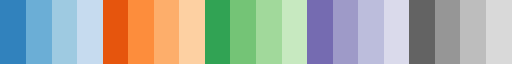

In [22]:
plt.get_cmap("tab20c")

In [48]:
from surfplot import Plot

In [61]:
plot._image_cache

{PosixPath('mats/atlases/fsaverage/tpl-fsaverage_den-41k_hemi-L_inflated.surf.gii'): <BSPolyData object at 0x14de5e5c8850 [Wrapping a vtkmodules.vtkCommonDataModel.vtkPolyData(0x560dd7b995d0]>,
 PosixPath('mats/atlases/fsaverage/tpl-fsaverage_den-41k_hemi-R_inflated.surf.gii'): <BSPolyData object at 0x14de5e4d68d0 [Wrapping a vtkmodules.vtkCommonDataModel.vtkPolyData(0x560dd74d0f30]>,
 PosixPath('mats/atlases/fsaverage/tpl-fsaverage_den-41k_hemi-L_desc-sulc_midthickness.shape.gii'): <nibabel.gifti.gifti.GiftiImage at 0x14de5f6036d0>,
 PosixPath('mats/atlases/fsaverage/tpl-fsaverage_den-41k_hemi-R_desc-sulc_midthickness.shape.gii'): <nibabel.gifti.gifti.GiftiImage at 0x14de5e4d8050>,
 '../fconv/mats/suma-fsaverage6/lh.inf_10.gii': <BSPolyData object at 0x14de4c12bd10 [Wrapping a vtkmodules.vtkCommonDataModel.vtkPolyData(0x560e0eadaa60]>,
 '../fconv/mats/suma-fsaverage6/rh.inf_10.gii': <BSPolyData object at 0x14de4c191410 [Wrapping a vtkmodules.vtkCommonDataModel.vtkPolyData(0x560e13ad97

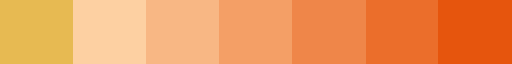

In [18]:
custom_cmap = ListedColormap(["#E7BA52", "#FDD0A2", "#F8B784", "#F49F66", "#EF8649", "#EB6E2B", "#E6550D"])
custom_cmap

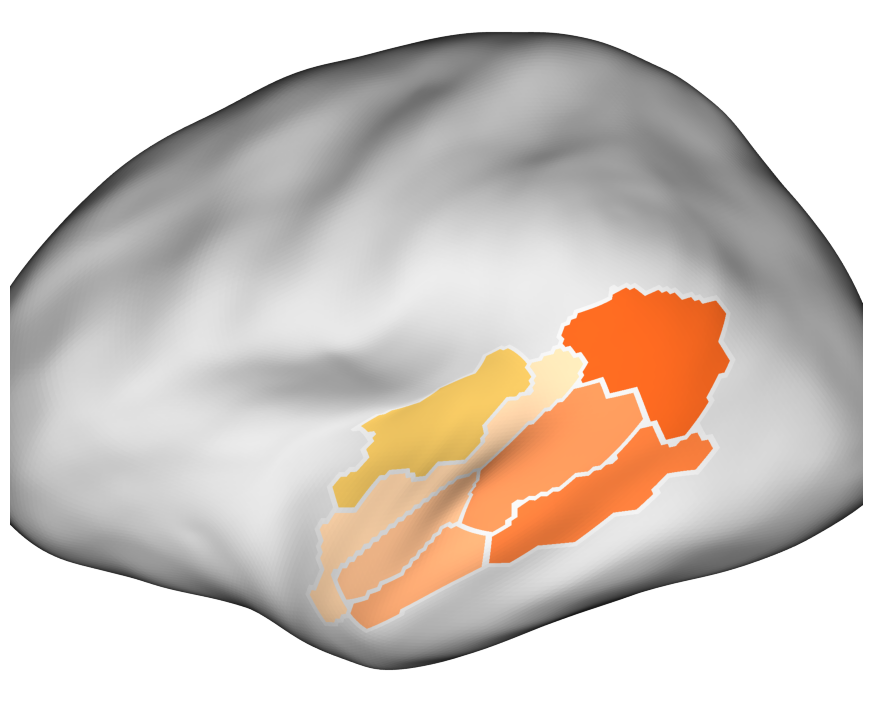

In [98]:
surf_lh = 'mats/atlases/fsaverage/tpl-fsaverage_den-41k_hemi-L_inflated.surf.gii'
# surf_lh = plot._image_cache['../fconv/mats/suma-fsaverage6/lh.inf_200.gii']

p = Plot(surf_lh=surf_lh, brightness=0.7, views='lateral', zoom=1.75, size=(1000, 800))

p.add_layer(
    label_img[:40962],
    cmap=custom_cmap,
    cbar=not True,
    color_range=(1, 10),
)

p.add_layer(label_img[:40962], cmap="gray_r", as_outline=True, cbar=False)

fig = p.build()
fig.show()

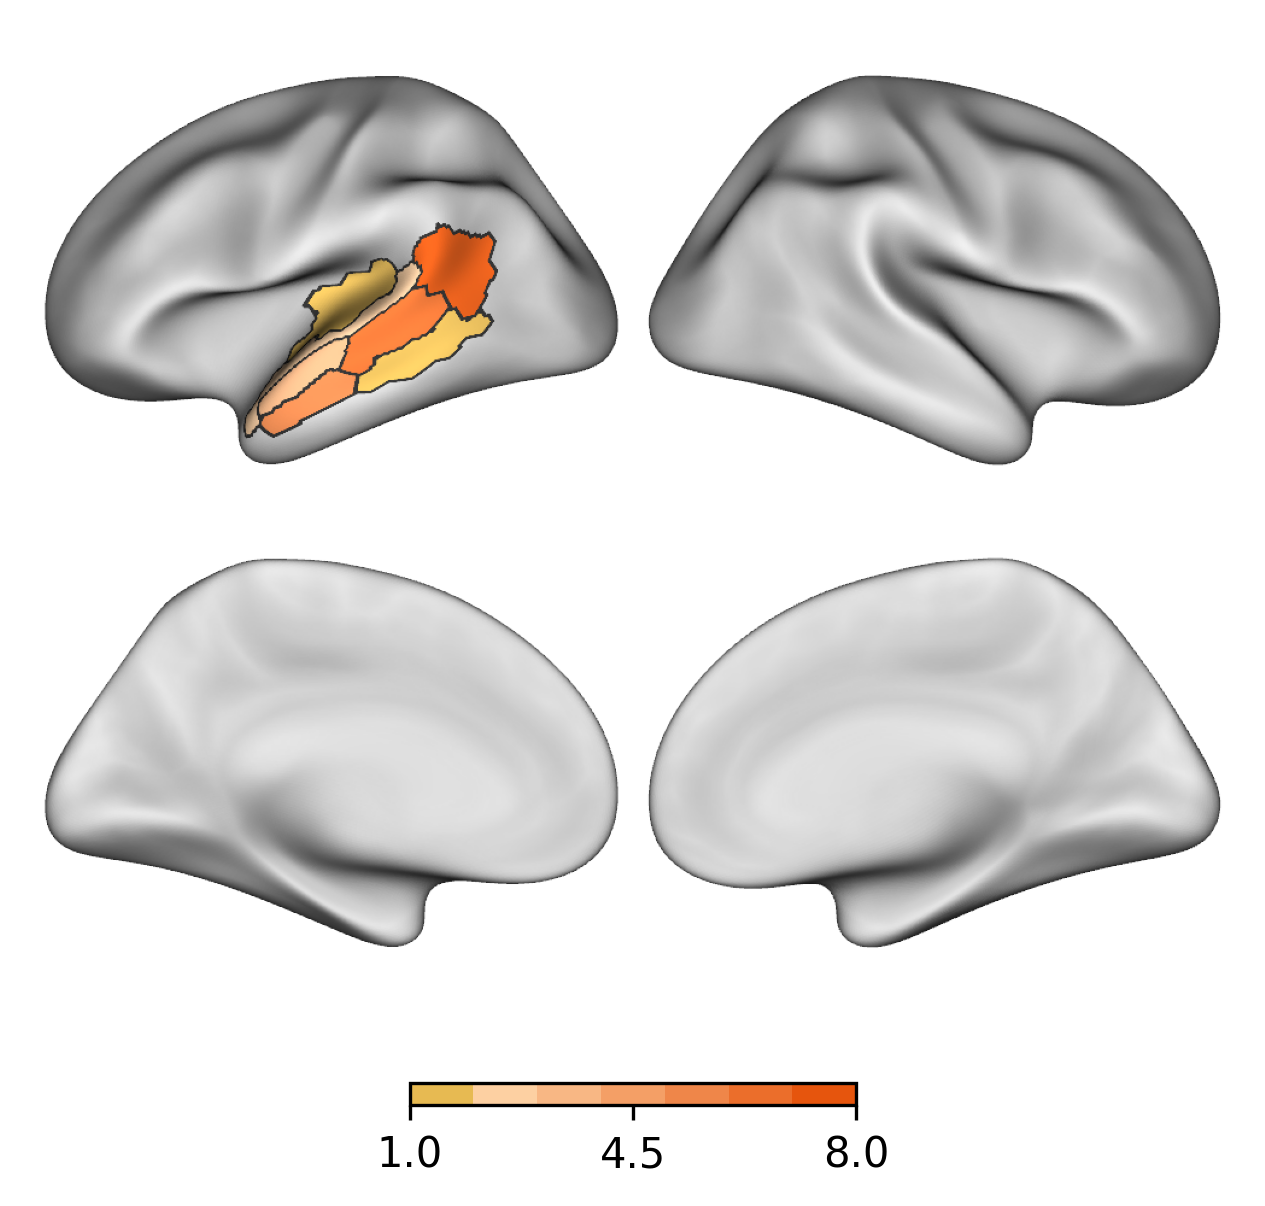

In [88]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(
                  label_img,# % n_rois,
                #   (label_img) % (n_rois+1) - 1,
                  # cmap='tab20b', vmin=1, vmax=n_rois,
                  cmap=custom_cmap, vmin=1, vmax=n_rois+1,
                  atlas=custom_atlas,
                  fig=fig, ax=ax,
                  surf_lh_fn="../fconv/mats/suma-fsaverage6/lh.inf_200.gii",
                  surf_rh_fn="../fconv/mats/suma-fsaverage6/rh.inf_200.gii",
                  add_sulc=True, sulc_alpha=0.25, zoom=1.5,
                  cbar=True)
fig.show()

NameError: name 'label_img' is not defined

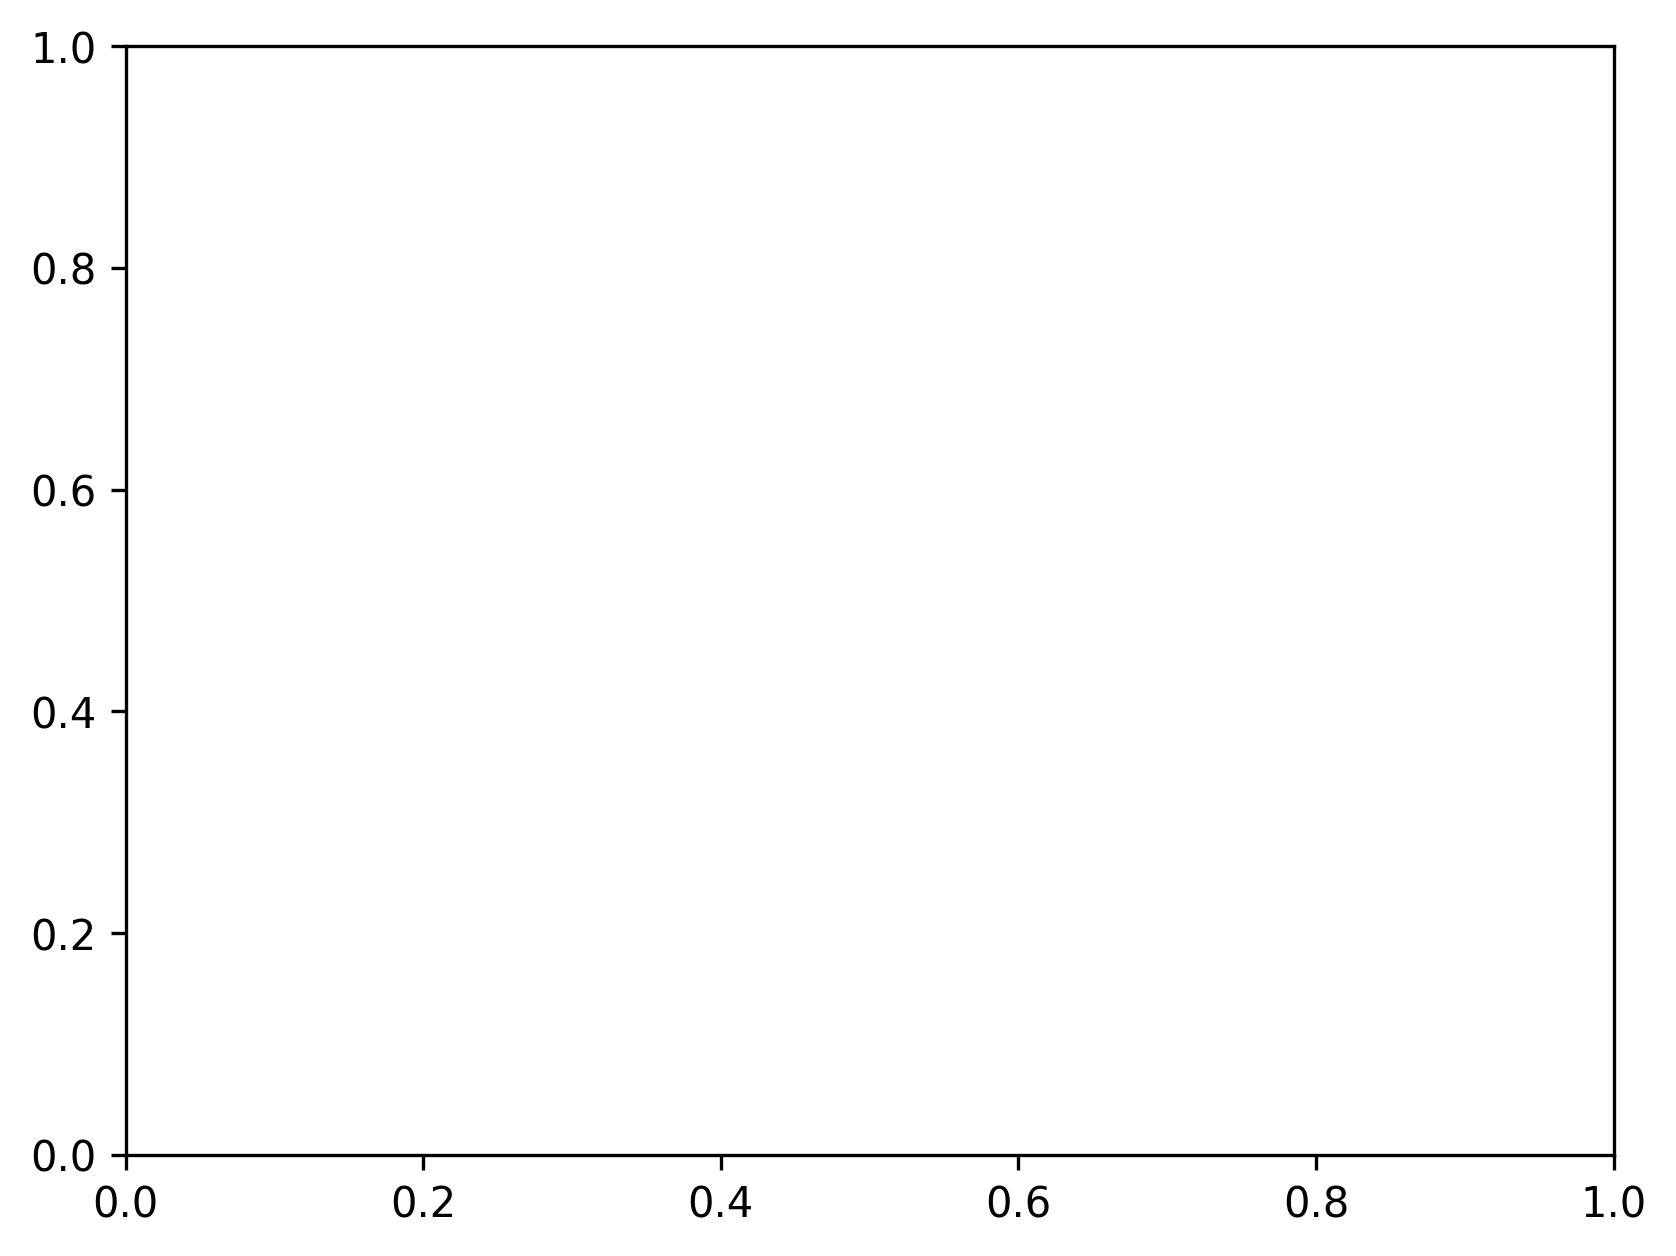

In [5]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(
                  label_img % n_rois,
                #   (label_img) % (n_rois+1) - 1,
                  cmap='tab20b', vmin=1, vmax=n_rois,
                  atlas=custom_atlas,
                  fig=fig, ax=ax,
                  # surf_lh_fn="../fconv/mats/suma-fsaverage6/lh.inf_10.gii",
                  # surf_rh_fn="../fconv/mats/suma-fsaverage6/rh.inf_10.gii",
                  # add_sulc=True, sulc_alpha=0.25,
                  cbar=True)
fig.show()

In [10]:
glasser = Atlas.glasser2016()

In [29]:
eac = ['A1', 'LBelt', 'MBelt', 'PBelt', 'RI']
stg = ['A4', 'A5', 'TA2', 'STGa']
stsd = ['STSda', 'STSdp']
stsv = ['STSva', 'STSvp']
sts = stsd + stsv
smg = ['PSL']
pstg = ['TPOJ1', 'STV']

roi = eac

other = glasser.roimask([f'L_{l}' for l in roi] + [f'R_{l}' for l in roi])

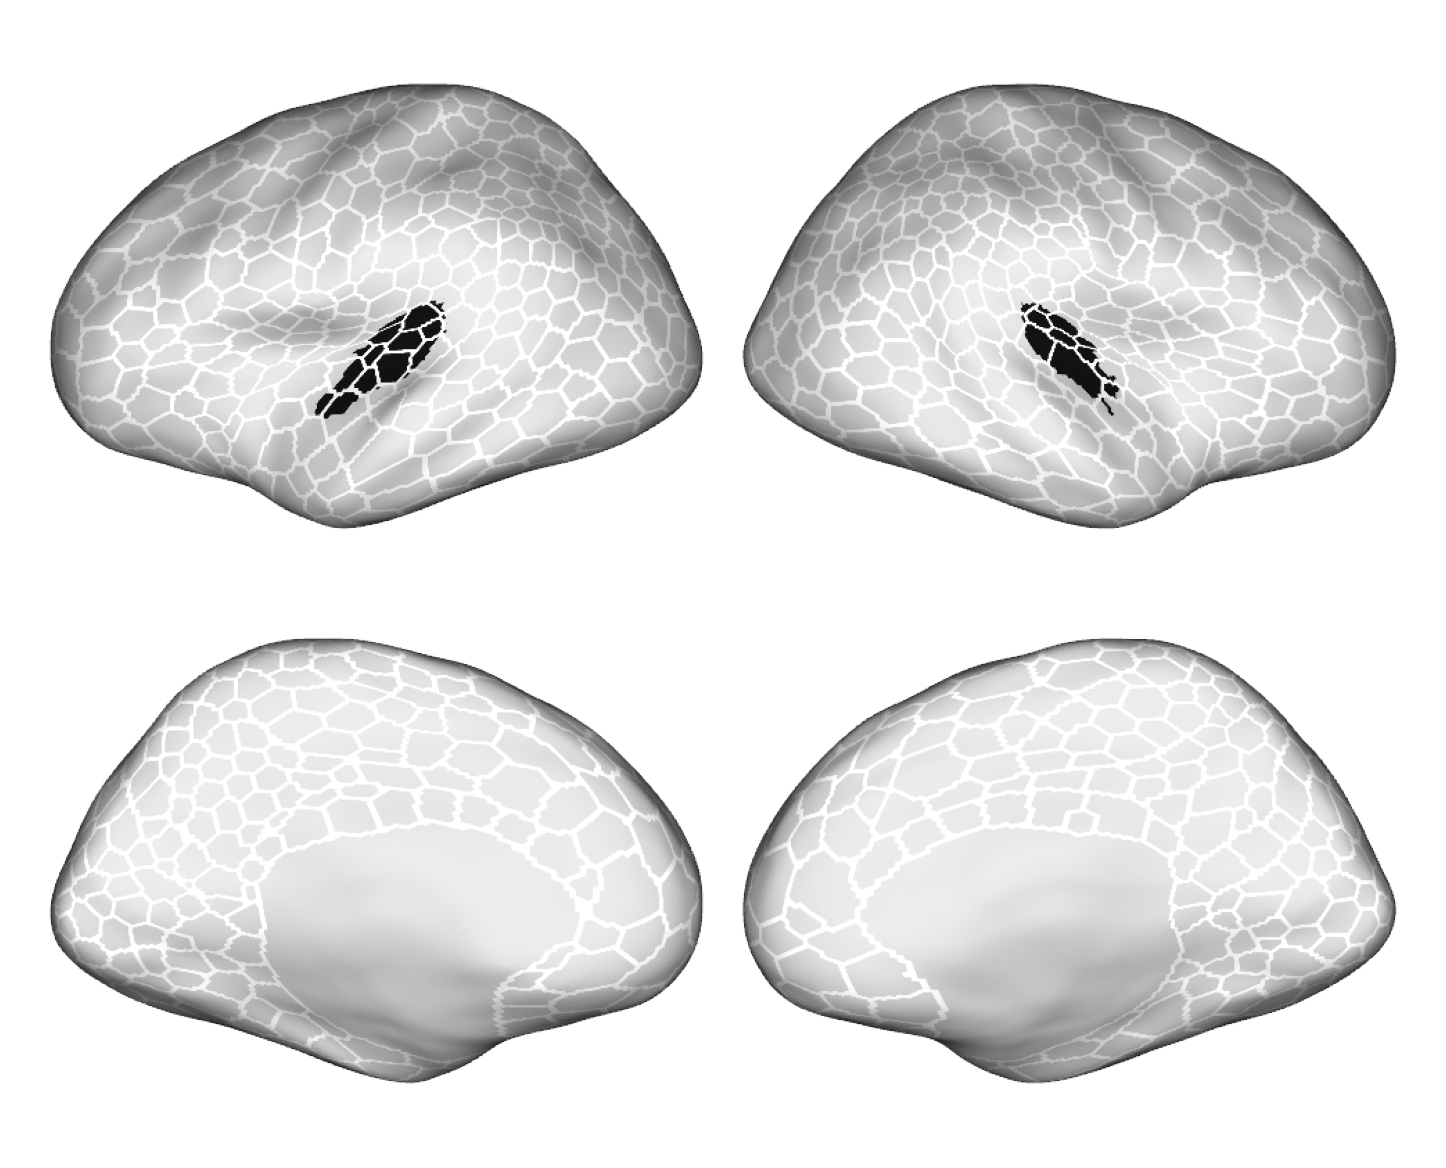

In [30]:
fig, ax = plt.subplots(dpi=300)
p = plot.get_surfplot(
    # surf_lh_fn="../fconv/mats/suma-fsaverage6/lh.inf_10.gii",
    # surf_rh_fn="../fconv/mats/suma-fsaverage6/rh.inf_10.gii",
)
p.add_layer(other, cmap="gray")#, as_outline=True, cbar=False)
p.add_layer(schaefer.label_img, cmap="gray_r", as_outline=True, cbar=False)
plotter = p.render()
plotter._check_offscreen()
x = plotter.to_numpy(transparent_bg=True, scale=(2, 2))
ax.imshow(x)
ax.axis("off")
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(
                  label_img % n_rois,
                  cmap='Spectral', vmin=1, vmax=n_rois,
                  atlas=custom_atlas,
                  fig=fig, ax=ax,
                  surf_lh_fn="../fconv/mats/suma-fsaverage6/lh.inf_50.gii",
                  surf_rh_fn="../fconv/mats/suma-fsaverage6/rh.inf_50.gii",
                  views=['anterior'], flip=True,
                  cbar=False)
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=300)
plot.surface_plot(
                  label_img % n_rois,
                  cmap='Spectral', vmin=1, vmax=n_rois,
                  atlas=custom_atlas,
                  fig=fig, ax=ax,
                  surf_lh_fn="../fconv/mats/suma-fsaverage6/lh.inf_50.gii",
                  surf_rh_fn="../fconv/mats/suma-fsaverage6/rh.inf_50.gii",
                  views=['posterior'],
                  cbar=False)
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=300)
# composite2 = lana_bin + nslg_bin + nara_bin
composite2 = np.zeros_like(label_img)
plot.surface_plot(composite2, vmin=1, vmax=4, cmap="viridis", atlas=custom_atlas, fig=fig, ax=ax, cbar=False)
# plot.surface_plot(narratives, vmin=0, cmap="YlOrRd_r", atlas=custom_atlas, fig=fig, ax=ax, cbar=False)
fig.text(.5, .5, 'composite', ha='center')
fig.show()